# Numpy Array vs Python Lists

In [1]:
#Speed:
#checking time required to run the code using List.
a = [i for i in range(10000000)]
b = [i for i in range(10000000, 20000000)]
c = []

import time
start = time.time()   #Shows current time after running the program(starts from 0 seconds.)
for i in range(len(a)):
    c.append(a[i] + b[i])
print(time.time()-start)

2.6931729316711426


In [2]:
#Checking time required to run the code using Numpy.
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)
start = time.time()
c = a + b    #No need of loop in numpy, automatically item wise addition.
print(time.time()-start)

0.10608243942260742


In [3]:
4.209/0.141 #Checking time difference

29.851063829787233

In [4]:
#Memory:
#using Lists
a = [i for i in range(10000000)]
import sys

sys.getsizeof(a)   #Gives the size taken in the memory in bytes.

89095160

In [5]:
#Using numpy:
a = np.arange(10000000, dtype= np.int16)
sys.getsizeof(a)        #Uses int64/32 until we reduce the size from dtype.

20000112

In [6]:
#Convinience:
#How easy the work is.
#Numpy is much better.

# Advance Indexing

In [7]:
#Normal indexing and slicing.
a = np.arange(24).reshape(6,4)

In [8]:
#Fancy Indexing:
#In this type of indexing, we provide a list in which we put the list number of the array.
#fetching a row or a column except any one of the of the row or column or their values is not possible through normal indexing.
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [9]:
#By using fancy indexing,
a[[0,2,3,5]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [10]:
#Fetching columns,
a[:,[1,2,3]]

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15],
       [17, 18, 19],
       [21, 22, 23]])

In [11]:
#Boolean Indexing:
a = np.random.randint(1,100,24).reshape(6,4)  #This function taking the number b/w the random number is to be created and the 24 means 24 random number is to be created
print(a)

[[85 95 55  2]
 [58 50  6 51]
 [44 87 29 30]
 [57 32  1  4]
 [41 61 25 74]
 [51 17  5 16]]


In [12]:
#1. Find all numbers greater than 50.
a > 50 #gives True and false in matrix form

array([[ True,  True,  True, False],
       [ True, False, False,  True],
       [False,  True, False, False],
       [ True, False, False, False],
       [False,  True, False,  True],
       [ True, False, False, False]])

In [13]:
a[a > 50] #masking: it creates a matrix where, if the item in the 'a' matrix has the value greater than 50 remains and the false values are removed.

array([85, 95, 55, 58, 51, 87, 57, 61, 74, 51])

In [14]:
#Find out even numbers:
a % 2 == 0

array([[False, False, False,  True],
       [ True,  True,  True, False],
       [ True, False, False,  True],
       [False,  True, False,  True],
       [False, False, False,  True],
       [False, False, False,  True]])

In [15]:
a[a % 2 == 0]

array([ 2, 58, 50,  6, 44, 30, 32,  4, 74, 16])

In [16]:
#Find the numbers greater than 50 and are even.
(a > 50) & (a % 2 == 0)  #using '&', because whenever we work with bitwise operator we use '&' instead of 'and'.

array([[False, False, False, False],
       [ True, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False]])

In [17]:
a[(a > 50) & (a % 2 == 0)]

array([58, 74])

In [18]:
#Find all numbers not divisible by 7.
a[(a % 7 != 0)]

array([85, 95, 55,  2, 58, 50,  6, 51, 44, 87, 29, 30, 57, 32,  1,  4, 41,
       61, 25, 74, 51, 17,  5, 16])

# Broadcasting

The term broadcasting describes how numpy treats arrays with different shapes during arithematic operations.
The smaller array is "Broadcast" across the larger array so that they have compatible shapes.

In [19]:
#Same Shape:
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)
print(a)
print(b)

a+b   #Item wise addition.

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]


array([[ 6,  8, 10],
       [12, 14, 16]])

In [20]:
#Different Shapes:
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)
print(a)
print(b)

print(a+b)  #Different shapes array can also give the output.This is because of broadcasting.

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


# Broadcasting Rules

1. Make the two arrays have the same number of dimensions.

    1. If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.

2. Make each dimension of the two arrays the same size.

    1. If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
    2. If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

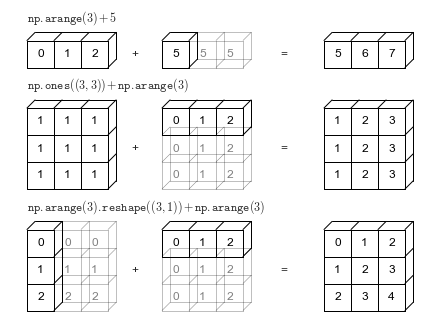

In [21]:
#Examples:
a = np.arange(12).reshape(4,3)
b = np.arange(3)    #make (1,3) and then (4,3)
print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [22]:
#Examples:
a = np.arange(12).reshape(3,4)
b = np.arange(3)    #make (1,3) and then (4,3)
print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [23]:
#Examples:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)    #make (1,3) and then (4,3)
print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [24]:
#Examples:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)    #make (1,3) and then (4,3)
print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [25]:
a = np.array([1])
#shape-> (1,1)
b = np.arange(4).reshape(2,2)

print(a)
print(b)
print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [26]:
a = np.arange(12).reshape(4,3)   
b = np.arange(12).reshape(3,4)
print(a)
print(b)
#gives error, since it has same dimension but not same shape and 1 cannot be added bcoz of same dimension.
print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


ValueError: operands could not be broadcast together with shapes (4,3) (3,4) 

In [27]:
a = np.arange(12,14).reshape(3,4)   
b = np.arange(12).reshape(4,3)

print(a)
print(b)
a+b

ValueError: cannot reshape array of size 2 into shape (3,4)

# Working with mathematical formulas

In [28]:
#1. Sigmoid: used in logistic reg.and dL
#For calculating sigmoid there is no function present in numpy.So we have to create a function for calculating sigmoid.
#calculationg sigmoid of every item in an array.
def sigmoid(array):
    #Formula for calculating sigmoid.
    return 1/(1+np.exp(-(array)))

a = np.arange(10)
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

In [29]:
#2. Mean Squared error:
"""This function give the predicted output for a given input(can be correct or not correct),
and then we have to subtract the predicted output from the original output and square of that substraction."""
#Here also there is no direct function in numpy to calculate MSE.

'This function give the predicted output for a given input(can be correct or not correct),\nand then we have to subtract the predicted output from the original output and square of that substraction.'

In [30]:
actual = np.random.randint(1,50,25)     #Consider actual data from the dataset.
predicted = np.random.randint(1,50,25)  #Consider as a prediction of ml algorithm.

In [31]:
actual

array([36, 45, 36,  9, 48, 10, 44, 34,  1, 36,  8, 32, 10, 44, 42, 38, 34,
       29, 27, 28, 28, 40, 12, 16, 29])

In [32]:
predicted

array([48, 22, 23,  7,  9, 32, 31, 46,  5, 38, 49, 48, 21, 45, 17, 41, 31,
       47, 36, 46,  4, 27,  5, 15,  4])

In [33]:
def mse(actual,predicted):
    return np.mean((actual - predicted)**2)  #Items wise calculation 

mse(actual,predicted)

321.4

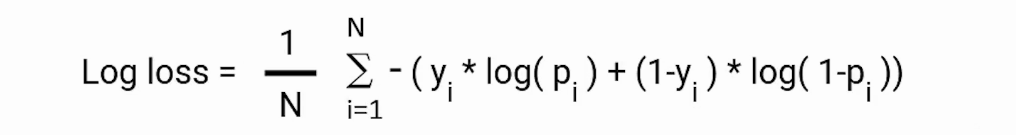

In [53]:
#Binary Cross entropy:
y = np.random.randint(1,50,10)
p = np.random.randint(1,50,10)

def BCE(y,p):
    P = 1-p
    return np.sum(-(y * np.log(p) + (1-y) * np.log(P)))/np.size(y)

In [54]:
BCE(y,p)

C:\Users\Vedant\AppData\Local\Temp\ipykernel_5628\1471050439.py:7: RuntimeWarning: invalid value encountered in log
  return np.sum(-(y * np.log(p) + (1-y) * np.log(P)))/np.size(y)


nan

# Working with missing values

In [35]:
#Working with missing values: np.nan ('nan' value)
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [36]:
np.isnan(a)   #Checking every value in the array if it is a 'nan' value. returns True for a 'nan' value.

array([False, False, False, False,  True, False])

In [37]:
a[np.isnan(a)]   #gives a 'nan' value

array([nan])

In [38]:
a[~np.isnan(a)]  #gives an array with the removal of 'nan' value.

array([1., 2., 3., 4., 6.])

# Plotting graphs

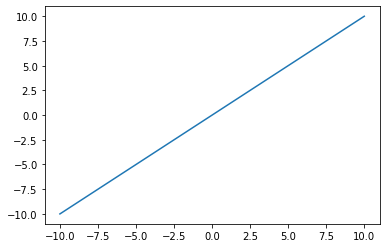

In [39]:
#Plotting a 2D plot:
#shape of both the array must be same.
#1. x=y
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = x

plt.plot(x,y)

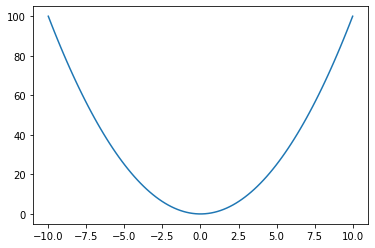

In [40]:
#y = x^2:

x = np.linspace(-10,10,100)
y = x**2  #squaring every item

plt.plot(x,y)

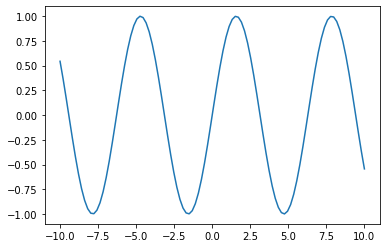

In [41]:
# y = sin(x)
x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y)

C:\Users\Vedant\AppData\Local\Temp\ipykernel_5628\3903925937.py:3: RuntimeWarning: invalid value encountered in log
  y = x*np.log(x)


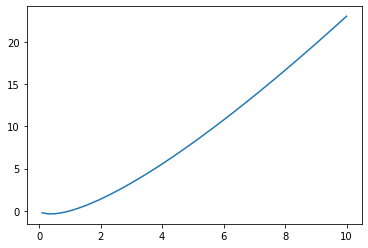

In [42]:
# y = xlog(x)
x = np.linspace(-10,10,100)
y = x*np.log(x)

plt.plot(x,y)

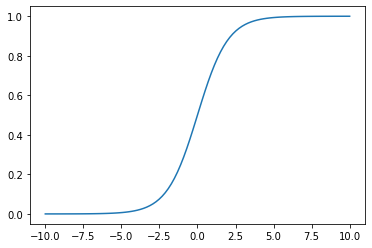

In [43]:
#Sigmoid Graph:
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y)

In [44]:
#We have to use linspace while plotting the graph because if other methods used, the graph will be incorrect

In [55]:
#When we create a function taking array as a input, then the nan value will be converted to zero, we can change the value.

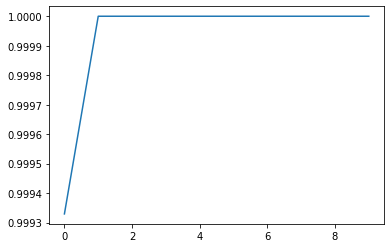

In [56]:
import matplotlib.pyplot as plt

x = np.random.randint(1,50,10)
y = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

plt.plot(y)